# SLC Mid Exam

### DATA DESCRIPTION: 
This data set contains 1668 loan_disbursed records and 3377 loan_rejected records. The data set was collected from New York, USA. action_taken is a class label used to divide into two groups (loan_disbursed (1) or loan_rejected(0)).


 agency_name: loan agency  

 applicant_race: race of the applicant

 applicant_sex: gender of applicant 

 lien_status_name: A lien gives a creditor the legal right to seize and sell a borrower's collateral property or asset which fails to fulfil a loan or contract obligations. The owner cannot sell the property that is the subject of a lien without the permission of the lien holder

 loan_purpose_name: Purpose for which loan is required

 applicant_annual_income: Annual income of applicant is US Dollars

 locality_median_family_income: Median income of family in the locality where property is located

 loan_amount: amount for which loan is needed

### 1.	Data Understanding (8 Marks)
Some pointers which would help you, but don’t be limited by these

a.	a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b. Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category (2 MARK)

d. Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (4 MARK)

In [1]:
#importing some library
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss,classification_report




In [2]:
df=pd.read_csv('data_set.csv')
df.head()

,action_taken,agency_name,applicant_race,applicant_sex,lien_status_name,loan_purpose_name,applicant_annual_income,locality_median_family_income,loan_amount
0,1,HUD,White,Male,Secured by a first lien,Home purchase,121000.0,109000,232000
1,1,NCUA,White,Female,Secured by a first lien,Home improvement,31000.0,82700,9000
2,1,CFPB,American Indian or Alaska Native,Male,Secured by a first lien,Home purchase,82000.0,69000,210000
3,1,HUD,Asian,Male,Secured by a first lien,Refinancing,NaN,82700,178000
4,1,NCUA,White,Female,Secured by a first lien,Refinancing,83000.0,109000,200000


In [3]:
df.shape

(2005, 9)

In [4]:
#extract all column name
df.columns

Index(['action_taken', 'agency_name', 'applicant_race', 'applicant_sex',
       'lien_status_name', 'loan_purpose_name', 'applicant_annual_income',
       'locality_median_family_income', 'loan_amount'],
      dtype='object')

In [5]:
#datatype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 9 columns):
action_taken                     2005 non-null int64
agency_name                      2005 non-null object
applicant_race                   2005 non-null object
applicant_sex                    2005 non-null object
lien_status_name                 2005 non-null object
loan_purpose_name                2005 non-null object
applicant_annual_income          1844 non-null float64
locality_median_family_income    2005 non-null int64
loan_amount                      2005 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 141.1+ KB


In [6]:
df_categorical=df.select_dtypes(object)

In [31]:
df_numerical=df.select_dtypes(int)

In [32]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [33]:
print('the categorical columns:',len(categorical_columns))
print('numerical columns',len(numerical_columns))

the categorical columns: 5
numerical columns 4


In [11]:
#calculate five point summary
from numpy import percentile
from numpy.random import rand
df_numerical=rand(1000)
quartiles=percentile(df_numerical,[25,50,75])
data_min,data_max=df_numerical.min(),df_numerical.max()
print('min:%3f'% data_min)
print('Q1:%3f'%quartiles[0])
print('median:%3f'%quartiles[1])
print('Q3:%3f'%quartiles[2])
print('max:%3f'% data_max)

min:0.000002
Q1:0.245721
median:0.503300
Q3:0.758517
max:0.999417


In [12]:
df.describe()

,action_taken,applicant_annual_income,locality_median_family_income,loan_amount
count,2005.00000,1.844000e+03,2005.000000,2.005000e+03
mean,0.83192,1.318509e+05,82902.992519,3.188274e+05
std,0.37403,1.508244e+05,17263.205510,8.580253e+05
min,0.00000,9.000000e+03,57200.000000,2.000000e+03
25%,1.00000,6.700000e+04,71300.000000,1.000000e+05
50%,1.00000,9.800000e+04,71300.000000,2.250000e+05
75%,1.00000,1.470000e+05,109000.000000,3.700000e+05
max,1.00000,2.414000e+06,109000.000000,3.185000e+07


In [13]:
#percentage of categorical columns and no.of categories.
print('% value in each categories column')
for k in df_categorical:
    print('\n% value in columns:',k)
    print(df[k].value_counts()/len(df[k]*100))

% value in each categories column

% value in columns: agency_name
CFPB    0.344140
HUD     0.273815
NCUA    0.249875
FDIC    0.070324
FRS     0.053367
OCC     0.008479
Name: agency_name, dtype: float64

% value in columns: applicant_race
White                                        0.704239
Information not provided                     0.112718
Black or African American                    0.077307
Asian                                        0.076309
Not applicable                               0.020449
American Indian or Alaska Native             0.005985
Native Hawaiian or Other Pacific Islander    0.002993
Name: applicant_race, dtype: float64

% value in columns: applicant_sex
Male                        0.598005
Female                      0.317706
Information not provided    0.063840
Not applicable              0.020449
Name: applicant_sex, dtype: float64

% value in columns: lien_status_name
Secured by a first lien          0.863342
Secured by a subordinate lien    0.069825
Not s

In [14]:
#lets check for missing values
missing_value=df.isna().sum().sort_values(ascending=False)
percentage_missing=(df.isna().sum()*100/df.isna().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percentage_missing],axis=1,keys=['Total','percentage of misssing values'])
missing_data

,Total,percentage of misssing values
applicant_annual_income,161,8.029925
loan_amount,0,0.000000
locality_median_family_income,0,0.000000
loan_purpose_name,0,0.000000
lien_status_name,0,0.000000
applicant_sex,0,0.000000
applicant_race,0,0.000000
agency_name,0,0.000000
action_taken,0,0.000000


applicant_annual_income have the null values

In [15]:
# lets fill the null value
	
df['applicant_annual_income']=df['applicant_annual_income'].fillna(121000.0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 9 columns):
action_taken                     2005 non-null int64
agency_name                      2005 non-null object
applicant_race                   2005 non-null object
applicant_sex                    2005 non-null object
lien_status_name                 2005 non-null object
loan_purpose_name                2005 non-null object
applicant_annual_income          2005 non-null float64
locality_median_family_income    2005 non-null int64
loan_amount                      2005 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 141.1+ KB


In [17]:
df['applicant_annual_income']=df['applicant_annual_income'].apply(np.int64)

In [19]:
#outlier detection
df.skew()

action_taken                     -1.776602
applicant_annual_income           7.615547
locality_median_family_income     0.656852
loan_amount                      26.531325
dtype: float64

In [40]:
#target is imbalanced so we do upsampling
# we use smote
#splitting train and test data

from sklearn.model_selection import train_test_split
x_num=df.select_dtypes(np.number)
x_num

,action_taken,applicant_annual_income,locality_median_family_income,loan_amount
0,1,121000,109000,232000
1,1,31000,82700,9000
2,1,82000,69000,210000
3,1,121000,82700,178000
4,1,83000,109000,200000
5,1,109000,68500,108000
6,1,87000,60000,276000
7,0,74000,71300,380000
8,1,154000,109000,368000
9,1,207000,109000,519000


### 2. Data Preparation (17 marks)
a. Fix the defects found above and do appropriate treatment if any. (4 MARK)

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (3 MARK)

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? (3 MARK)

d. Perform imputation for categorical features (3 MARK)

e. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (4 MARK)

In [55]:
#2a treatment of outlier by powertransformation:
pt=PowerTransformer()


In [56]:
df_power=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns)
df_power.head()

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,action_taken,applicant_annual_income,locality_median_family_income,loan_amount
0,0.449487,0.0,0.0,0.164872
1,0.449487,0.0,0.0,-2.089695
2,0.449487,0.0,0.0,0.074372
3,0.449487,0.0,0.0,-0.072265
4,0.449487,0.0,0.0,0.030642


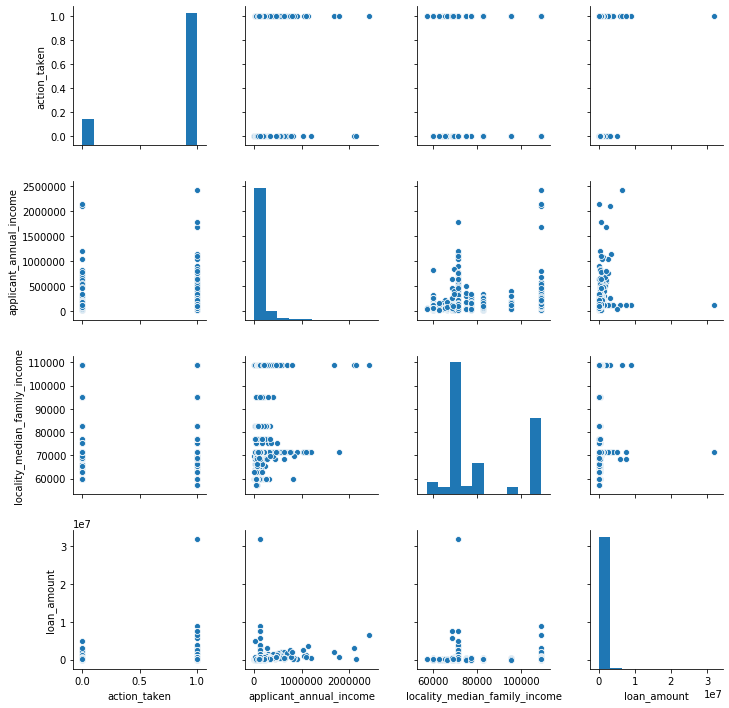

In [22]:
#we will use pairplot to visulaize
import seaborn as sns
sns.pairplot(df)
plt.show()

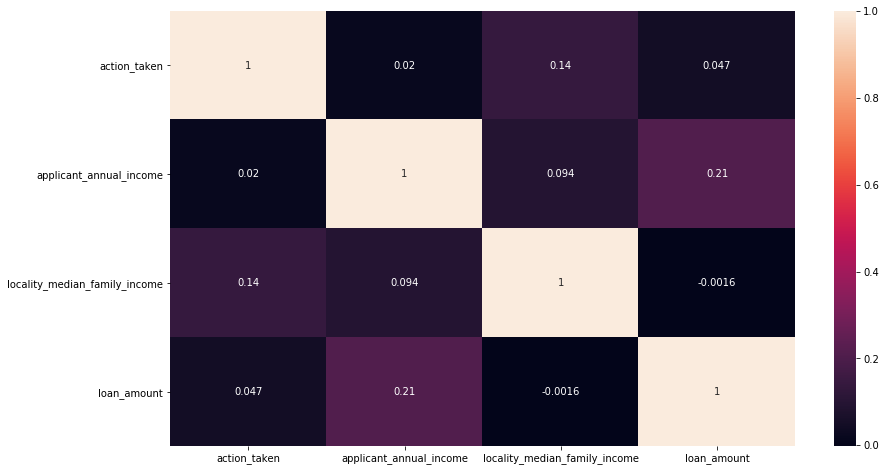

In [44]:
# 2b. highly correlated

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

locality median family is highly correlated with applicant annual income

In [35]:
#2c. we find the milticollineatity
X=df_numerical

In [37]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['vif']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [38]:
vif_data

,feature,vif
0,action_taken,5.542522
1,applicant_annual_income,1.912371
2,locality_median_family_income,6.209584
3,loan_amount,1.192580


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
#target variable
y=df[['action_taken']].reset_index(drop=True)

In [ ]:
#2.e #splitting the data into training and testing set in the ratio

In [59]:
rc=10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rc)

In [ ]:
#logit model summary
X_train_const=sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train_const).fit()
logit_model.summary()

In [ ]:
#significance feature affecting the model
#if the p value is less than 0.05 we are considering the feature to be significant

significant=logit_model.pvalues[logit_model.pvalues<0.05]
significant_feature=pd.DataFrame(data=significant,columns=['p-value'])
significant_features.drop('const',axis=0)

### 3. Model Building (25 marks)
a. Fit a base model and explain the reason of selecting that model. Please write your key observations. (5 marks)

b. What is the overall Accuracy? Please comment on whether it is good or not. (4 mark)

c. Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (5 marks)

d. How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (7 marks)

e. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)

In [65]:
#3a.As the model is showing about the loan things ans the salary of the person whether he is able to get a loan or not 
#so in this model some amount is fixed so ,that the person fill full the eligible criteria get the laon otherwise he will not get a loan
#so according to this model we see the limitation of accepting and rejecting loan and its should be changed because middle class family cant bear that amount.

In [ ]:
#3b.#model evalution:McFadden's R2 value
accuracy=logit_model.prsquared
print('logit model accuracy',accuracy)


the accuracy is 0.44713111

In [ ]:
#calculating the tpr and fpr by YOUDEN INDEX:
fpr,tpr,th=0.5,the=roc_curve(y_test,ypred_prob)
#creating dataframe
youndepd.DataFrame({'TPR':tpr
                   'FPR':fpr
                   'thres':th})

#calculating the YOUNDEN INDEX
youden['yi']=youden.TPR-youden.FPR
youden=youden.sort_values(vy='yi',ascending=False).reset_index(drop=True)
print('optimal threshold for probability',round(youden['yi'].max(),2))

optimat threshold value is 0.65